# Association Rule Mining

## Problem Statement
A book retail store wants to leverage transaction data to understand customer purchasing habits by identifying associations between books frequently bought together. This insight can help in optimizing book placement and developing strategies to increase revenue through cross-selling.

CRISP-ML(Q) process model describes six phases:

Business and Data Understanding
Data Preparation
Model Building
Model Evaluation
Deployment
Monitoring and Maintenance

**Objective(s)**: Maximize Profits by identifying associations between books in transactions.

**Constraints**: Minimize Marketing Cost

**Success Criteria**

**Business Success Criteria**: Improve the Cross selling in Retail Store by 15% - 20%

**ML Success Criteria**: Accuracy : NA; Performance : Complete processing within 5 mins on every quarter data

**Economic Success Criteria**: Increase in the Retail Store profits by atleast 15%

**Proposed Plan**: Analyze the book transaction data to identify frequent itemsets and generate association rules that will inform marketing and sales strategies.

**CRISP-ML(Q) Process Phases:
Business and Data Understanding: Gain insights into customer purchasing patterns.
Data Preparation: Clean and structure the transaction data for analysis.
Model Building: Use Apriori and Association Rule Mining to identify patterns.
Model Evaluation: Evaluate the rules based on metrics like support, confidence, and lift.
Deployment: Use the insights to optimize book placement and cross-selling.
Monitoring and Maintenance: Continuously monitor customer trends and update strategies.**

### Data Collection
Data: The daily transactions made by the customers are captured by the store.

Description: A total of 1999 transactions data captured for the month.

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Access the data which is in the list format
# We use open function to access the file content 

df = pd.read_csv(r"C:\Users\Swapnil Mishra\Desktop\DS_Codes_Swapnil\Asscociation_Rules\2\book.csv")
df.head(10)

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
5,1,0,0,0,0,1,0,0,0,0,1
6,0,1,0,0,0,0,0,0,0,0,0
7,0,1,0,0,1,0,0,0,0,0,0
8,1,0,0,1,0,0,0,0,0,0,0
9,1,1,1,0,0,0,1,0,0,0,0


In [3]:
viewing = pd.DataFrame(df)
viewing.tail()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0
1999,0,0,0,0,0,0,0,0,0,0,0


In [4]:
# Itemsets
frequent_itemsets = apriori(df,min_support= 0.0075,max_len= 4,use_colnames = True)
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
461,0.0090,"(ArtBks, GeogBks, ItalArt, Florence)"
462,0.0125,"(ItalCook, ArtBks, ItalAtlas, ItalArt)"
463,0.0095,"(ItalCook, ArtBks, ItalArt, Florence)"
464,0.0090,"(ItalCook, GeogBks, ItalAtlas, ItalArt)"


In [5]:
# Most frequent itemsets based on support
frequent_itemsets.sort_values('support', ascending = False , inplace = True)
frequent_itemsets

,support,itemsets
2,0.4310,(CookBks)
0,0.4230,(ChildBks)
3,0.2820,(DoItYBks)
6,0.2760,(GeogBks)
12,0.2560,"(CookBks, ChildBks)"
...,...,...
423,0.0075,"(CookBks, GeogBks, ItalArt, Florence)"
346,0.0075,"(YouthBks, CookBks, ItalCook, Florence)"
408,0.0075,"(CookBks, RefBks, ItalCook, Florence)"
351,0.0075,"(YouthBks, DoItYBks, RefBks, Florence)"


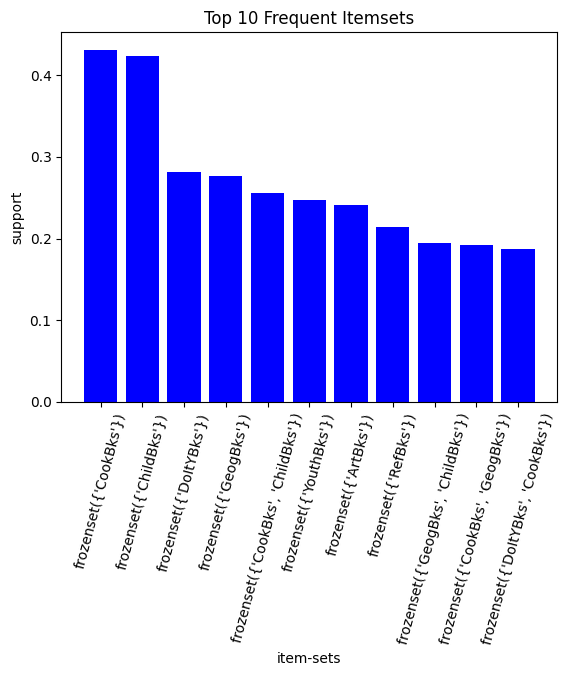

In [6]:
plt.bar(x = list(range(0, 11)), height = frequent_itemsets.support[0:11], color ='blue')
plt.xticks(list(range(0, 11)), frequent_itemsets.itemsets[0:11], rotation=75)
plt.xlabel('item-sets')
plt.ylabel('support')
plt.title('Top 10 Frequent Itemsets')
plt.show()

In [7]:
# Association Rules
rules = association_rules(frequent_itemsets, metric = 'lift', min_threshold = 1)
print(rules.head(20))

   antecedents consequents  antecedent support  consequent support  support  \
0    (CookBks)  (ChildBks)              0.4310              0.4230   0.2560   
1   (ChildBks)   (CookBks)              0.4230              0.4310   0.2560   
2    (GeogBks)  (ChildBks)              0.2760              0.4230   0.1950   
3   (ChildBks)   (GeogBks)              0.4230              0.2760   0.1950   
4    (CookBks)   (GeogBks)              0.4310              0.2760   0.1925   
5    (GeogBks)   (CookBks)              0.2760              0.4310   0.1925   
6   (DoItYBks)   (CookBks)              0.2820              0.4310   0.1875   
7    (CookBks)  (DoItYBks)              0.4310              0.2820   0.1875   
8   (DoItYBks)  (ChildBks)              0.2820              0.4230   0.1840   
9   (ChildBks)  (DoItYBks)              0.4230              0.2820   0.1840   
10    (ArtBks)   (CookBks)              0.2410              0.4310   0.1670   
11   (CookBks)    (ArtBks)              0.4310      

In [8]:
rules.sort_values('lift',ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2144,"(RefBks, ItalArt)","(ArtBks, ItalAtlas)",0.0200,0.0180,0.0165,0.825000,45.833333,0.01614,5.611429
2141,"(ArtBks, ItalAtlas)","(RefBks, ItalArt)",0.0180,0.0200,0.0165,0.916667,45.833333,0.01614,11.760000
3342,"(GeogBks, ItalAtlas)","(RefBks, ItalArt)",0.0205,0.0200,0.0115,0.560976,28.048780,0.01109,2.232222
3339,"(RefBks, ItalArt)","(GeogBks, ItalAtlas)",0.0200,0.0205,0.0115,0.575000,28.048780,0.01109,2.304706
3147,"(ItalAtlas, ItalCook)","(RefBks, ItalArt)",0.0230,0.0200,0.0125,0.543478,27.173913,0.01204,2.146667
3150,"(RefBks, ItalArt)","(ItalAtlas, ItalCook)",0.0200,0.0230,0.0125,0.625000,27.173913,0.01204,2.605333
2605,"(ChildBks, ItalAtlas)","(RefBks, ItalArt)",0.0285,0.0200,0.0145,0.508772,25.438596,0.01393,1.995000
2608,"(RefBks, ItalArt)","(ChildBks, ItalAtlas)",0.0200,0.0285,0.0145,0.725000,25.438596,0.01393,3.532727
3886,"(RefBks, ItalArt)","(DoItYBks, ItalAtlas)",0.0200,0.0190,0.0095,0.475000,25.000000,0.00912,1.868571
3883,"(DoItYBks, ItalAtlas)","(RefBks, ItalArt)",0.0190,0.0200,0.0095,0.500000,25.000000,0.00912,1.960000


### Handling Profusion of Rules (Duplication Elimination)

In [9]:
def to_list(i):
    return(sorted(list(i)))

In [10]:
ma_X = rules.antecedents.apply(to_list) + rules.consequents.apply(to_list)

ma_X

0                          [CookBks, ChildBks]
1                          [ChildBks, CookBks]
2                          [GeogBks, ChildBks]
3                          [ChildBks, GeogBks]
4                           [CookBks, GeogBks]
                         ...                  
4481    [Florence, ItalArt, GeogBks, ItalCook]
4482    [ItalCook, Florence, GeogBks, ItalArt]
4483    [GeogBks, Florence, ItalArt, ItalCook]
4484    [ItalArt, Florence, GeogBks, ItalCook]
4485    [Florence, GeogBks, ItalArt, ItalCook]
Length: 4486, dtype: object

In [11]:
ma_X = ma_X.apply(sorted)
ma_X

0                          [ChildBks, CookBks]
1                          [ChildBks, CookBks]
2                          [ChildBks, GeogBks]
3                          [ChildBks, GeogBks]
4                           [CookBks, GeogBks]
                         ...                  
4481    [Florence, GeogBks, ItalArt, ItalCook]
4482    [Florence, GeogBks, ItalArt, ItalCook]
4483    [Florence, GeogBks, ItalArt, ItalCook]
4484    [Florence, GeogBks, ItalArt, ItalCook]
4485    [Florence, GeogBks, ItalArt, ItalCook]
Length: 4486, dtype: object

In [12]:
rules_sets = list(ma_X)
rules_sets

[['ChildBks', 'CookBks'],
 ['ChildBks', 'CookBks'],
 ['ChildBks', 'GeogBks'],
 ['ChildBks', 'GeogBks'],
 ['CookBks', 'GeogBks'],
 ['CookBks', 'GeogBks'],
 ['CookBks', 'DoItYBks'],
 ['CookBks', 'DoItYBks'],
 ['ChildBks', 'DoItYBks'],
 ['ChildBks', 'DoItYBks'],
 ['ArtBks', 'CookBks'],
 ['ArtBks', 'CookBks'],
 ['ChildBks', 'YouthBks'],
 ['ChildBks', 'YouthBks'],
 ['ArtBks', 'ChildBks'],
 ['ArtBks', 'ChildBks'],
 ['CookBks', 'YouthBks'],
 ['CookBks', 'YouthBks'],
 ['CookBks', 'RefBks'],
 ['CookBks', 'RefBks'],
 ['ChildBks', 'RefBks'],
 ['ChildBks', 'RefBks'],
 ['ChildBks', 'CookBks', 'GeogBks'],
 ['ChildBks', 'CookBks', 'GeogBks'],
 ['ChildBks', 'CookBks', 'GeogBks'],
 ['ChildBks', 'CookBks', 'GeogBks'],
 ['ChildBks', 'CookBks', 'GeogBks'],
 ['ChildBks', 'CookBks', 'GeogBks'],
 ['ChildBks', 'CookBks', 'DoItYBks'],
 ['ChildBks', 'CookBks', 'DoItYBks'],
 ['ChildBks', 'CookBks', 'DoItYBks'],
 ['ChildBks', 'CookBks', 'DoItYBks'],
 ['ChildBks', 'CookBks', 'DoItYBks'],
 ['ChildBks', 'CookBks', '

In [13]:
unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]
unique_rules_sets

[['ChildBks', 'DoItYBks', 'YouthBks'],
 ['ChildBks', 'CookBks', 'DoItYBks', 'Florence'],
 ['DoItYBks', 'GeogBks', 'ItalAtlas', 'RefBks'],
 ['ChildBks', 'ItalAtlas', 'YouthBks'],
 ['ArtBks', 'ChildBks', 'CookBks', 'YouthBks'],
 ['CookBks', 'GeogBks', 'RefBks', 'YouthBks'],
 ['CookBks', 'GeogBks', 'ItalArt'],
 ['ArtBks', 'GeogBks', 'ItalAtlas', 'RefBks'],
 ['ArtBks', 'DoItYBks', 'GeogBks', 'RefBks'],
 ['DoItYBks', 'GeogBks', 'ItalCook', 'RefBks'],
 ['ChildBks', 'ItalArt', 'ItalCook', 'YouthBks'],
 ['ChildBks', 'Florence', 'GeogBks', 'YouthBks'],
 ['CookBks', 'Florence', 'GeogBks', 'RefBks'],
 ['ArtBks', 'GeogBks', 'ItalCook'],
 ['ArtBks', 'GeogBks', 'ItalCook', 'RefBks'],
 ['ArtBks', 'Florence', 'GeogBks'],
 ['ChildBks', 'CookBks', 'Florence', 'YouthBks'],
 ['DoItYBks', 'Florence', 'RefBks'],
 ['DoItYBks', 'ItalArt', 'ItalAtlas'],
 ['CookBks', 'DoItYBks', 'ItalArt', 'RefBks'],
 ['CookBks', 'DoItYBks', 'ItalAtlas', 'ItalCook'],
 ['ChildBks', 'CookBks', 'DoItYBks', 'GeogBks'],
 ['Florence'

In [14]:
index_rules = []
for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))
        
index_rules

[120,
 2042,
 3818,
 2396,
 326,
 656,
 1392,
 3320,
 998,
 2840,
 2628,
 2950,
 2368,
 904,
 2298,
 1144,
 2512,
 2670,
 3838,
 3804,
 3048,
 152,
 3920,
 512,
 476,
 16,
 1528,
 840,
 208,
 1692,
 2340,
 1534,
 2936,
 3034,
 3926,
 248,
 1726,
 3314,
 4402,
 1378,
 972,
 52,
 44,
 3892,
 306,
 66,
 2874,
 1972,
 2382,
 3308,
 3790,
 2258,
 3474,
 1616,
 1372,
 1108,
 168,
 3542,
 1870,
 3460,
 1724,
 100,
 254,
 0,
 3238,
 1768,
 932,
 3714,
 3618,
 2056,
 782,
 4084,
 3390,
 2354,
 1890,
 3630,
 418,
 714,
 294,
 3062,
 228,
 3266,
 526,
 1440,
 146,
 2312,
 2854,
 1012,
 4,
 4314,
 3156,
 3528,
 890,
 2168,
 3068,
 3700,
 1474,
 14,
 2984,
 672,
 1822,
 2162,
 680,
 1352,
 1974,
 3522,
 126,
 1748,
 3028,
 34,
 2566,
 360,
 86,
 1022,
 312,
 1986,
 574,
 4098,
 866,
 1944,
 2724,
 1718,
 4168,
 2868,
 402,
 2230,
 3116,
 1250,
 456,
 1842,
 3906,
 2084,
 820,
 2210,
 2,
 652,
 4154,
 1828,
 4210,
 2820,
 4430,
 2792,
 2540,
 3294,
 1150,
 3012,
 4196,
 1124,
 396,
 3966,
 3972,
 28

In [15]:
# Rules without any redudancy
rules_no_redundancy = rules.iloc[index_rules, : ]
rules_no_redundancy

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
120,"(YouthBks, DoItYBks)",(ChildBks),0.1155,0.4230,0.0950,0.822511,1.944470,0.046143,3.250902
2042,"(DoItYBks, CookBks, ChildBks)",(Florence),0.1460,0.1085,0.0175,0.119863,1.104728,0.001659,1.012911
3818,"(DoItYBks, RefBks, ItalAtlas)",(GeogBks),0.0190,0.2760,0.0095,0.500000,1.811594,0.004256,1.448000
2396,"(YouthBks, ItalAtlas)",(ChildBks),0.0175,0.4230,0.0150,0.857143,2.026342,0.007597,4.039000
326,"(YouthBks, ArtBks, CookBks)",(ChildBks),0.0810,0.4230,0.0670,0.827160,1.955462,0.032737,3.338357
...,...,...,...,...,...,...,...,...,...
1276,"(DoItYBks, GeogBks, ChildBks)",(ItalCook),0.1045,0.1135,0.0270,0.258373,2.276416,0.015139,1.195345
2464,"(DoItYBks, GeogBks, ChildBks)",(Florence),0.1045,0.1085,0.0150,0.143541,1.322955,0.003662,1.040913
144,(ArtBks),(RefBks),0.2410,0.2145,0.0895,0.371369,1.731325,0.037805,1.249541
674,"(CookBks, RefBks)",(ItalCook),0.1525,0.1135,0.0465,0.304918,2.686502,0.029191,1.275389


In [16]:
# Sorted list and top 10 rules
rules10 = rules_no_redundancy.sort_values('lift',ascending = False).head(10)

rules10

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3280,"(ArtBks, GeogBks, ItalAtlas)",(ItalArt),0.0115,0.0485,0.0115,1.000000,20.618557,0.010942,inf
3102,"(ArtBks, ItalAtlas, ItalCook)",(ItalArt),0.0130,0.0485,0.0125,0.961538,19.825535,0.011870,24.739000
3762,"(DoItYBks, ArtBks, ItalAtlas)",(ItalArt),0.0100,0.0485,0.0095,0.950000,19.587629,0.009015,19.030000
4224,"(YouthBks, ArtBks, ItalAtlas)",(ItalArt),0.0090,0.0485,0.0085,0.944444,19.473081,0.008064,17.127000
2546,"(ChildBks, ArtBks, ItalAtlas)",(ItalArt),0.0155,0.0485,0.0145,0.935484,19.288327,0.013748,14.748250
3012,"(ArtBks, ItalAtlas, CookBks)",(ItalArt),0.0140,0.0485,0.0130,0.928571,19.145803,0.012321,13.321000
2182,"(ArtBks, ItalAtlas)",(ItalArt),0.0180,0.0485,0.0165,0.916667,18.900344,0.015627,11.418000
2136,"(ArtBks, RefBks, ItalAtlas)",(ItalArt),0.0180,0.0485,0.0165,0.916667,18.900344,0.015627,11.418000
2244,"(ArtBks, RefBks, ItalCook)",(ItalArt),0.0235,0.0485,0.0160,0.680851,14.038166,0.014860,2.981367
1488,"(ArtBks, GeogBks, ItalCook)",(ItalArt),0.0360,0.0485,0.0240,0.666667,13.745704,0.022254,2.854500


<Axes: xlabel='support', ylabel='confidence'>

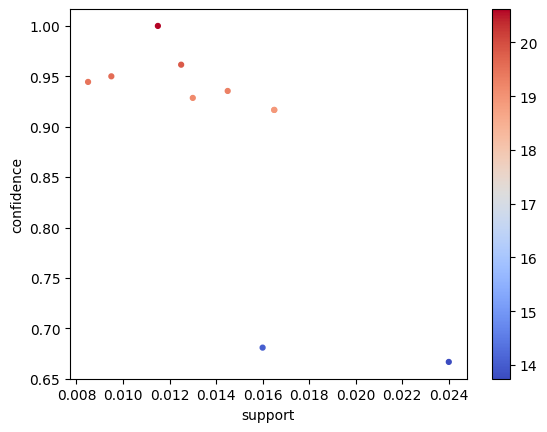

In [17]:
rules10.plot(x = "support", y = "confidence", c = rules10.lift, kind="scatter", s = 12, cmap = plt.cm.coolwarm)